In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] =14, 6
%matplotlib inline
from sklearn import metrics

In [12]:
data=pd.read_csv(r'C:\Users\admin\Downloads\Mall_Customers.csv')
print(data)
data.head()

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)
data.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
x=data.iloc[:,[2,3]].values

In [20]:
x.shape

(200, 2)

In [38]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [39]:
model=db.fit(x)

In [40]:
label=model.labels_

In [41]:
label

array([ 0,  0,  0,  0, -1,  0,  1,  0, -1, -1, -1,  1, -1,  0,  1,  0,  1,
        0, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3, -1,  2,  2,  2,  4, -1,  2,  4, -1,  4, -1, -1, -1, -1,  4,
       -1, -1,  4, -1, -1, -1, -1, -1,  5, -1, -1,  5, -1, -1, -1,  5, -1,
        5, -1, -1, -1,  6, -1,  7,  6, -1, -1,  7,  6,  7,  6,  7,  7,  6,
        8,  7,  6,  7,  8, -1,  8,  8,  8,  7,  9,  7,  7,  7,  8,  6,  6,
        6, -1,  9,  9,  9, -1, 10,  9,  9, -1,  9, -1,  9, -1, 10, -1, 10,
       -1, 10, -1, -1, -1, 10, 10, 10, 10, 10, -1, 10, 10, 10, -1, 10, -1,
       10, -1, 10, 10, 10, 10, 10, -1, 10, -1, 10, -1, 11, -1, -1, 11, 12,
       -1, 12, 11, 11, -1, 12, -1, 12, -1, -1, -1, 13, -1, 13, -1, 13, -1,
       13, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [42]:
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 14


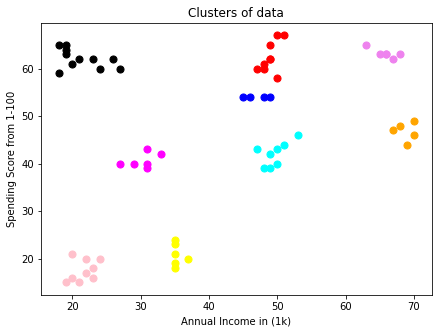

In [43]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()